#Рубежный контроль №1

Студент группы ИУ5-21М Жизневский Павел Вариант 3. Набор данных **3**.

##Задание

Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных с использованием библиотек Matplotlib и Seaborn. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков? Проведите корреляционный анализ. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

##Решение

###Импорт библотек и загрузка данных

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [0]:
data = make_dataframe(load_wine)

Проверим загруженные данные

In [0]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Оценим данные

In [0]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


Нет пропусков

In [0]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

Типы данных пригодны для анализа

In [0]:
print('Всего строк: {}'.format(data.shape[0])+', столбцов: {}'.format(data.shape[1]))

Всего строк: 178, столбцов: 14


###Парные диаграммы:

Построим парные диаграммы для визуального анализа зависимостей в данных

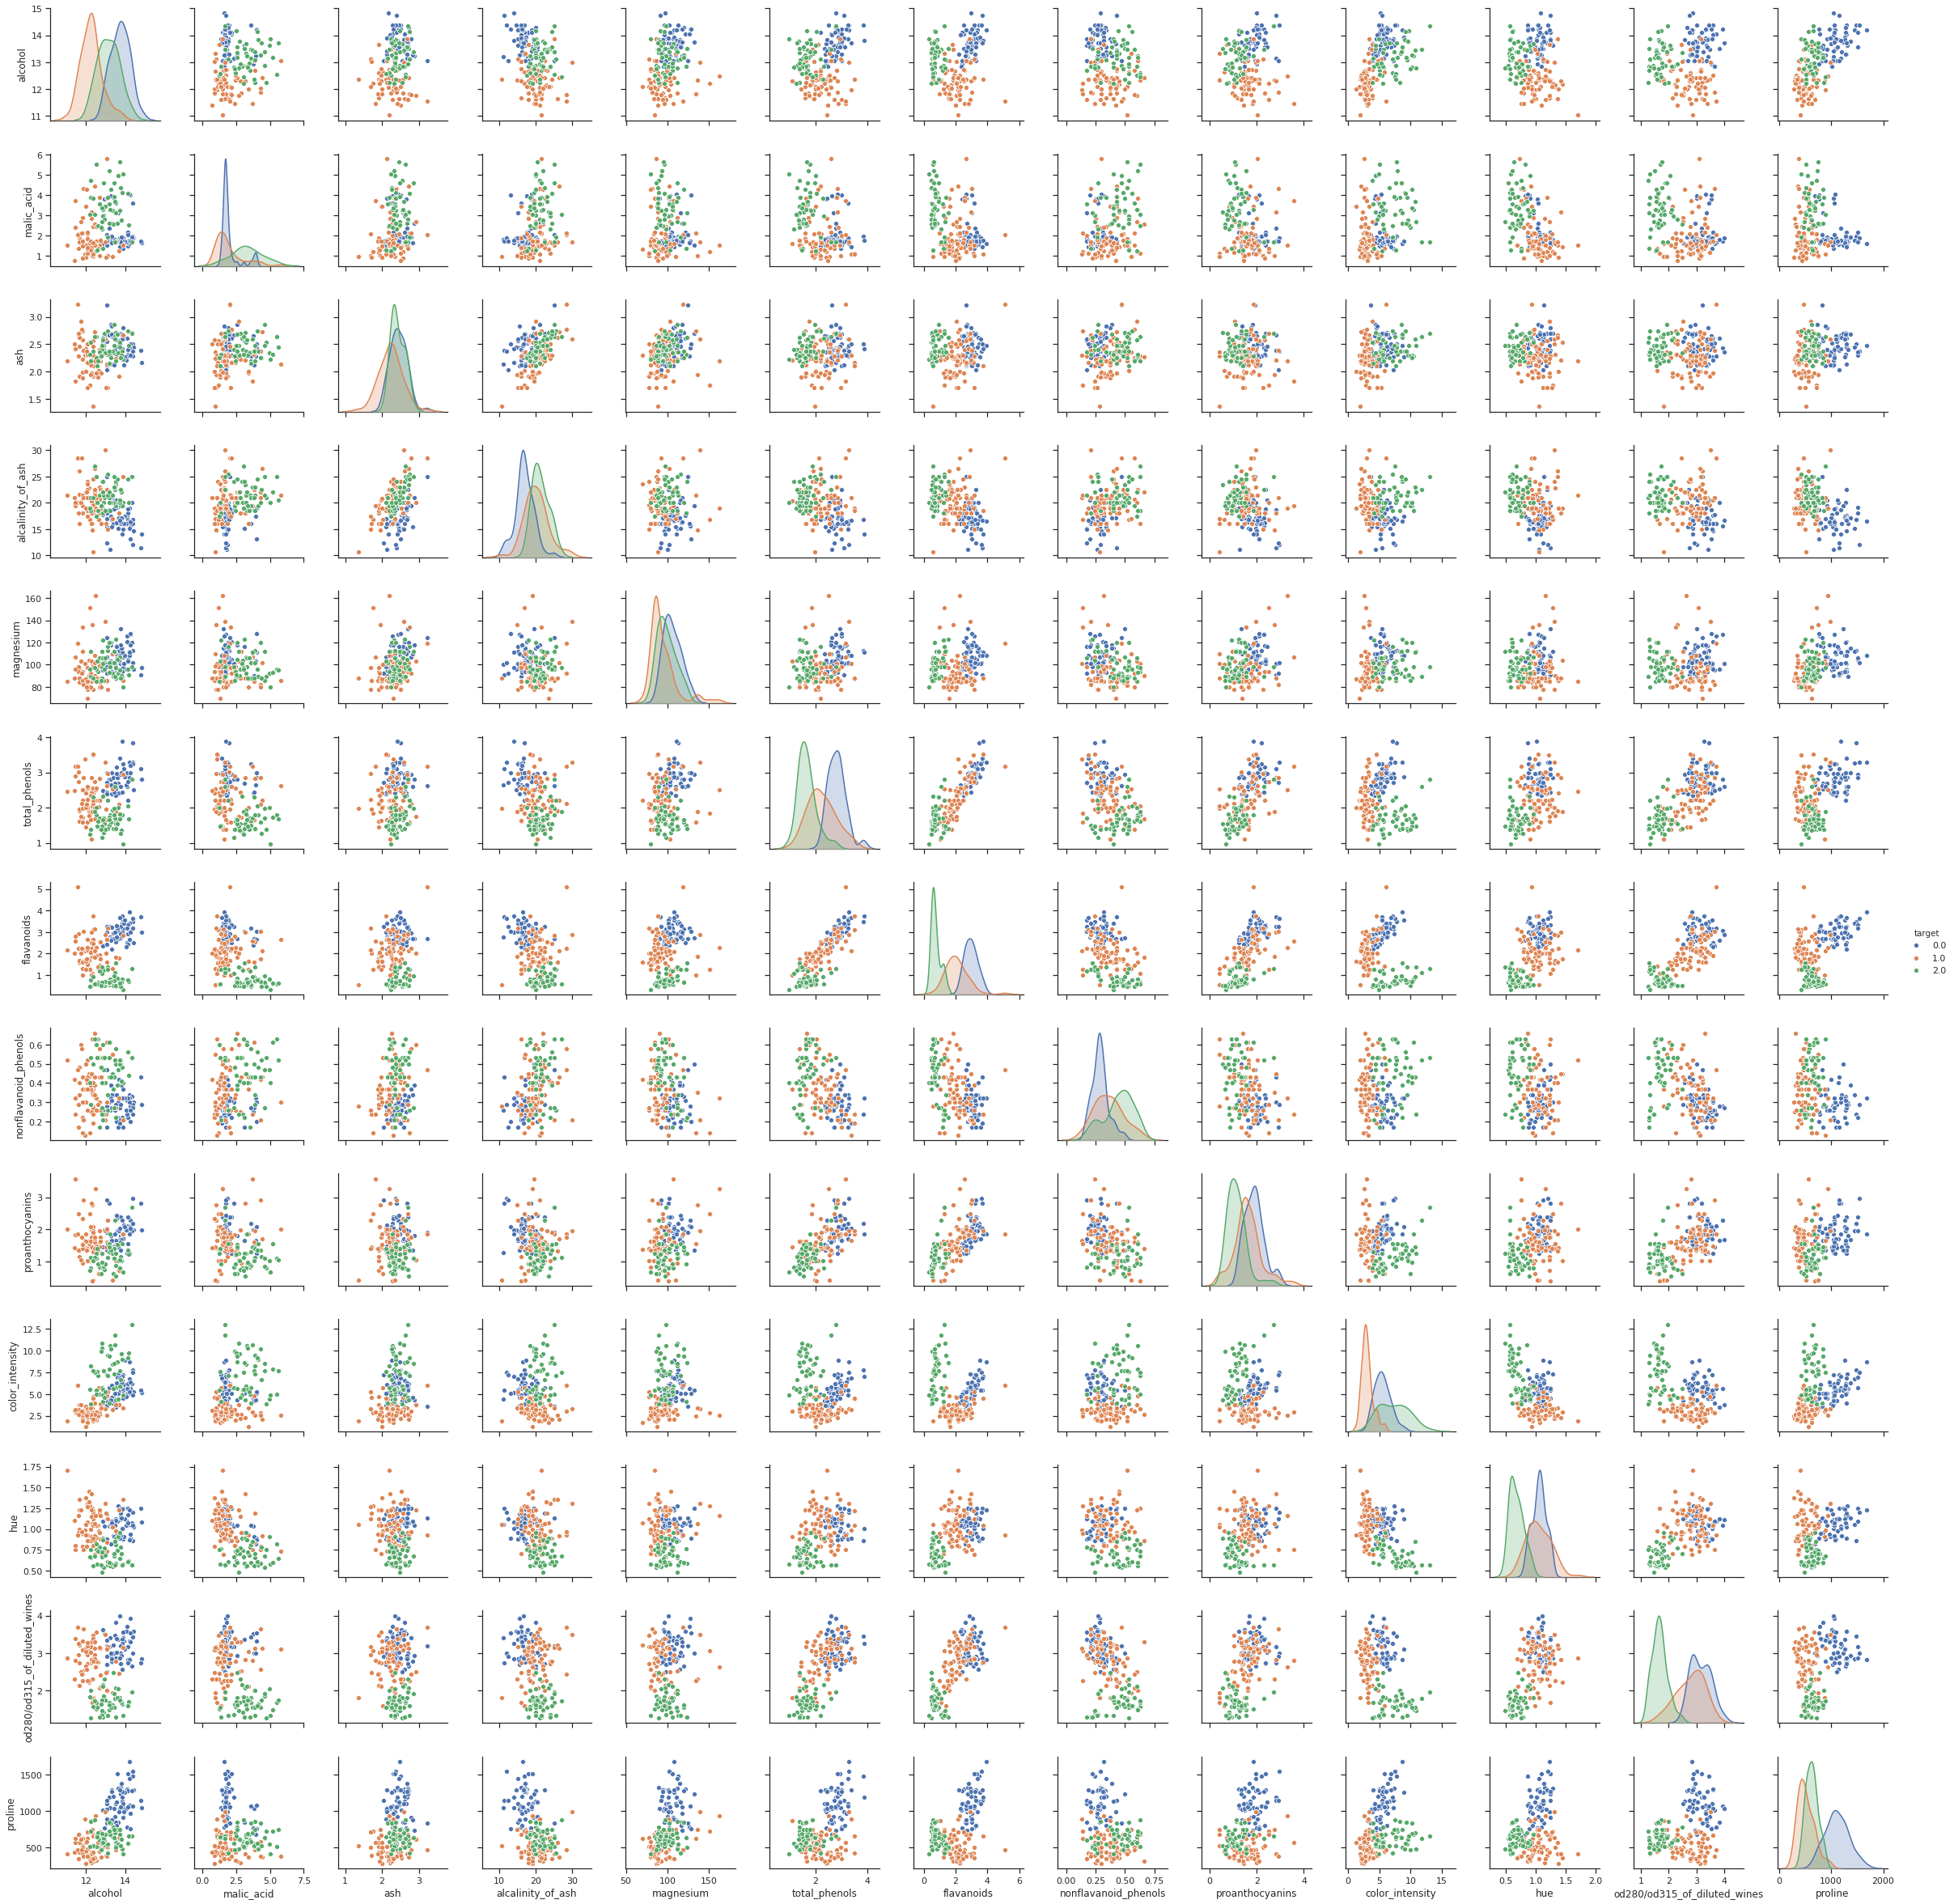

In [0]:
sns.pairplot(data, hue='target')

В результате быстрого визуального анализа полученных диаграмм выявлена наиболее явная зависимость между содержанием фенолов (total_phenols) и flavanoids (флавоноидами)

###Гистограмма величины осдака в образцах вин

AxesSubplot(0.125,0.125;0.775x0.755)


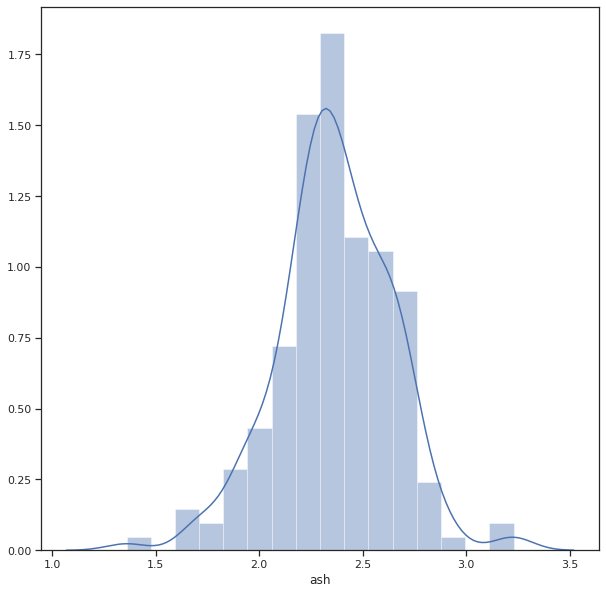

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
print(sns.distplot(data['ash']))

Из гистограммы заметно, что большинство сортов вин содержат в среднем 2-2,5мг золы. Данное распределение близко к нормальному.

Зависимость содержания спирта от класса вина

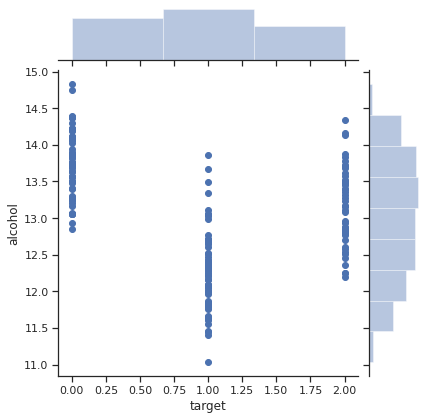

In [0]:
sns.jointplot(x="target", y="alcohol", data=data)

Таким образом, из диаграммы очевидно, что в винах 1го класса наименьшее содержание спирта.

###Корреляционный анализ

Проведем корреляционный анализ для установления возможных зависимостей между параметрами

In [0]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Тепловая карта для удобства визуальной оценки:

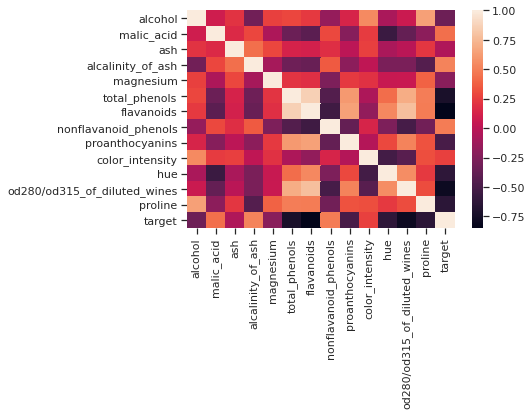

In [0]:
sns.heatmap(data.corr())

Отметим, что присутствует высокая корреляция между содержанием флавоноидов и оттенком вина.
Также наблюдается зависимость (корреляция) между содержанием пролина и спирта. Рассмотрим данные зависимости подробнее

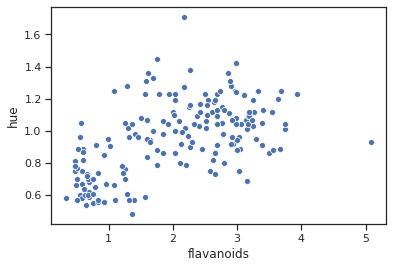

In [0]:
sns.scatterplot(x="flavanoids", y="hue", data=data)

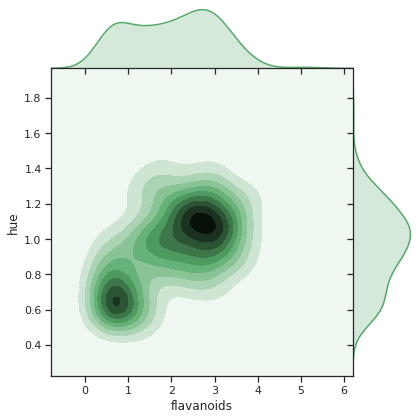

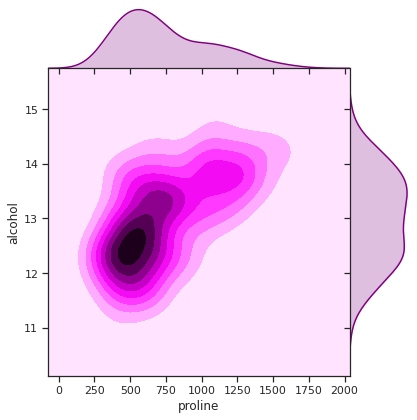

In [0]:
sns.jointplot(x="flavanoids", y="hue", data=data, kind="kde", space=0, color="g")
sns.jointplot(x="proline", y="alcohol", data=data, kind="kde", space=0, color="purple")

Также построим гистограммы и диаграмму рассеяния для общего количества фенолов и числа флавоноидов, у которых высокий коэффициент корреляции:

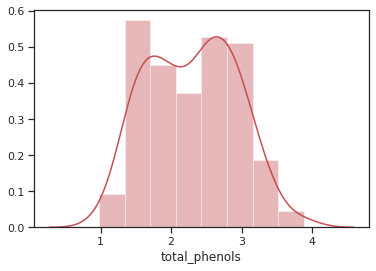

In [0]:
sns.distplot(data["total_phenols"], color="r")


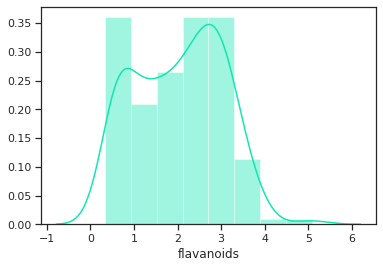

In [0]:
sns.distplot(data["flavanoids"], color="#10e7b1")

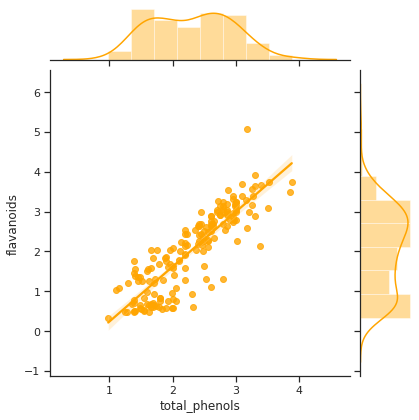

In [0]:
sns.jointplot(x="total_phenols", y="flavanoids", data=data, kind="reg", color="orange")

Из данного графика очевидна зависимость между общим числом фенолов и количеством флавоноидов

В датасете присутствует набор признаков, по которым прослеживается четкая кластеризация (т.е. можно отнести вино к определеннному классу). На основе этих принаков и обучающей выборки потенцально можно разработать нейронную сеть для решения задачи классификации вина по показателям химических и физических свойств.
